In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
from matplotlib import font_manager, rc  
font_name = font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

In [24]:
df1 = pd.read_csv('2014년 졸음운전 교통사고.csv', encoding = 'euc-kr')
df2 = pd.read_csv('2015년 졸음운전 교통사고.csv', encoding = 'euc-kr')
df3 = pd.read_csv('2016년 졸음운전 교통사고.csv', encoding = 'euc-kr')

In [25]:
data = pd.concat([df1,df2,df3])
#                      이 상태를 저장
data.set_index('구분', inplace=True)
data

,사고(건),사망(명),부상(명)
구분,,,
2014년1월,169,7,347
2014년2월,145,3,268
2014년3월,206,12,358
2014년4월,182,4,360
2014년5월,218,17,474
2014년6월,233,13,457
2014년7월,229,14,431
2014년8월,222,9,447
2014년9월,225,15,430


##### .copy(): 데이터 복붙

In [26]:
#데이터 복붙
dt=data.copy()
dt

,사고(건),사망(명),부상(명)
구분,,,
2014년1월,169,7,347
2014년2월,145,3,268
2014년3월,206,12,358
2014년4월,182,4,360
2014년5월,218,17,474
2014년6월,233,13,457
2014년7월,229,14,431
2014년8월,222,9,447
2014년9월,225,15,430


In [27]:
#문자열로 된 날짜를 날짜로 인식하게 날짜형식으로 변형해주기
#         datetime으로 변환(바꿔주고 싶은 데이터)
dt.index=pd.to_datetime(dt.index, format='%Y년%m월')
dt.set_index([dt.index.year, dt.index.month], inplace = True)
dt.index.names=['연도', '월']
dt

사고(건)  사망(명)  부상(명)
연도   월                      
2014 1     169      7    347
     2     145      3    268
     3     206     12    358
     4     182      4    360
     5     218     17    474
     6     233     13    457
     7     229     14    431
     8     222      9    447
     9     225     15    430
     10    210     14    392
     11    209     10    386
     12    178     12    329
2015 1     205      8    375
     2     175      8    375
     3     237      4    492
     4     227     10    486
     5     231      9    504
     6     207      8    401
     7     273      7    556
     8     268     19    534
     9     252     10    501
     10    214     14    475
     11    199      3    398
     12    213      8    428
2016 1     192      5    387
     2     174      6    328
     3     217      7    435
     4     216      7    419
     5     239     13    522
     6     200     12    362
     7     227      9    460
     8     230      7    490
     9     187     13    347
     10    183     10    367
     11    200      5    418
     12    168      4    364

- 연도별 평균 사망자
- 월별 평균 사망자
- 힌트: 평균 사망자
- 힌트: groupby()

In [41]:
#                              데이터프라임형식으로 가져오기위해서[]하나 더써줌
y = dt.groupby(['연도']).mean()['사망(명)']
y

연도
2014    10.833333
2015     9.000000
2016     8.166667
Name: 사망(명), dtype: float64

In [38]:
#                              데이터프라임형식으로 가져오기위해서[]하나 더써줌
y = dt.groupby(['연도']).mean()[['사망(명)']]
y

,사망(명)
연도,
2014,10.833333
2015,9.000000
2016,8.166667


In [39]:
m = dt.groupby(['월']).mean()[['사망(명)']]
m

,사망(명)
월,
1,6.666667
2,5.666667
3,7.666667
4,7.000000
5,13.000000
6,11.000000
7,10.000000
8,11.666667
9,12.666667


##### 2014년도 월별 사망, 부상 데이터를 바 차트로 표현하기

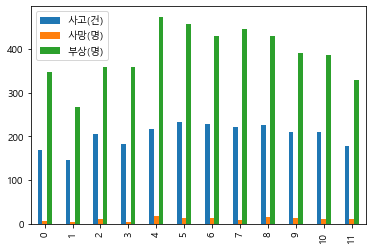

In [42]:
df1.plot(kind='bar')
plt.show()

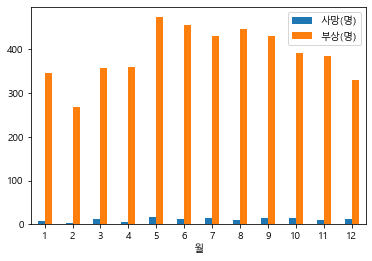

In [44]:
dt.loc[2014][['사망(명)', '부상(명)']].plot(kind='bar', rot=0)
plt.show()